<a href="https://colab.research.google.com/github/grandff/kdn-machinelearning/blob/main/KDN_PJT_%EC%A0%84%EB%A0%A5_%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [ ]:
!wget http://49.247.133.7/KDN_DAY4_1.zip
!unzip KDN_DAY4_1.zip -d data/

--2021-10-08 00:28:09--  http://49.247.133.7/KDN_DAY4_1.zip
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1452903 (1.4M) [application/zip]
Saving to: ‘KDN_DAY4_1.zip’

KDN_DAY4_1.zip      100%[===================>]   1.38M  1.37MB/s    in 1.0s    

2021-10-08 00:28:10 (1.37 MB/s) - ‘KDN_DAY4_1.zip’ saved [1452903/1452903]

Archive:  KDN_DAY4_1.zip
  inflating: data/submission.csv     
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
!pip install jaen

In [ ]:
# 실전프로젝트 환경 설정
from JAEN.project import Project
pjt = Project('전력 사용량 예측', # 프로젝트 이름
              '한전KDN',                       # 과정명
              '1차수 A반',                     # 차수 정보
              '198080@kdn.com')                  # 이메일 (숫자@kdn.com) * 본인의 이메일로 수정

# 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 데이터 로드
2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.|

In [ ]:
# train 데이터셋 로드 (train.csv)
train = pd.read_csv("./data/train.csv")
train
# 60개 건물 X 61일 X 24시간 = 87840

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
87835,60,2020-07-31 19:00:00,3603.744,25.0,2.7,95.0,0.0,0.0,1.0,1.0
87836,60,2020-07-31 20:00:00,3688.848,24.9,2.5,96.0,0.0,0.0,1.0,1.0
87837,60,2020-07-31 21:00:00,3765.312,24.9,1.9,96.0,0.0,0.0,1.0,1.0
87838,60,2020-07-31 22:00:00,3833.568,24.9,2.8,97.0,0.0,0.0,1.0,1.0


In [ ]:
# test 데이터셋 로드 (test.csv)
test = pd.read_csv("./data/test.csv")
test
# 60개 건물 X 24일 X 24시간 = 34560

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-08-01 00:00:00,25.0,3.4,90.0,1.0,0.0,0.0,0.0
1,1,2020-08-01 01:00:00,24.6,0.5,90.0,0.2,0.0,0.0,0.0
2,1,2020-08-01 02:00:00,24.6,0.5,91.0,0.0,0.0,0.0,0.0
3,1,2020-08-01 03:00:00,24.7,1.2,93.0,0.0,0.0,0.0,0.0
4,1,2020-08-01 04:00:00,24.7,0.8,94.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34555,60,2020-08-24 19:00:00,27.8,2.3,68.0,0.0,0.7,1.0,1.0
34556,60,2020-08-24 20:00:00,27.3,1.2,71.0,0.0,0.0,1.0,1.0
34557,60,2020-08-24 21:00:00,27.3,1.8,71.0,0.0,0.0,1.0,1.0
34558,60,2020-08-24 22:00:00,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
# train column 별 데이터 개수, 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num         87840 non-null  int64  
 1   date_time   87840 non-null  object 
 2   전력사용량(kWh)  87840 non-null  float64
 3   기온(°C)      87840 non-null  float64
 4   풍속(m/s)     87840 non-null  float64
 5   습도(%)       87840 non-null  float64
 6   강수량(mm)     87840 non-null  float64
 7   일조(hr)      87840 non-null  float64
 8   비전기냉방설비운영   87840 non-null  float64
 9   태양광보유       87840 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.7+ MB


In [ ]:
# test column 별 데이터 개수, 타입 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        34560 non-null  int64  
 1   date_time  34560 non-null  object 
 2   기온(°C)     34560 non-null  float64
 3   풍속(m/s)    34560 non-null  float64
 4   습도(%)      34560 non-null  float64
 5   강수량(mm)    34560 non-null  float64
 6   일조(hr)     34560 non-null  float64
 7   비전기냉방설비운영  34560 non-null  float64
 8   태양광보유      34560 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
# train 결측치 확인 
train.isnull().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [ ]:
# test 결측치 확인
test.isnull().sum()

num          0
date_time    0
기온(°C)       0
풍속(m/s)      0
습도(%)        0
강수량(mm)      0
일조(hr)       0
비전기냉방설비운영    0
태양광보유        0
dtype: int64

In [ ]:
# 본인의 판단에 따라 훈련에 사용할 feature와 사용하지 않을 feature를 선택합니다.
features = [
    'num',
    '기온(°C)',
    '풍속(m/s)',
    '습도(%)',
    '강수량(mm)',
    '일조(hr)',
    '비전기냉방설비운영',
    '태양광보유',
]
features

['num',
 '기온(°C)',
 '풍속(m/s)',
 '습도(%)',
 '강수량(mm)',
 '일조(hr)',
 '비전기냉방설비운영',
 '태양광보유']

In [ ]:
# features의 컬럼을 X로 설정한다.
X = train[features]
X

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
87835,60,25.0,2.7,95.0,0.0,0.0,1.0,1.0
87836,60,24.9,2.5,96.0,0.0,0.0,1.0,1.0
87837,60,24.9,1.9,96.0,0.0,0.0,1.0,1.0
87838,60,24.9,2.8,97.0,0.0,0.0,1.0,1.0


In [ ]:
# 전력사용량(kWh) 값을 Y값으로 설정한다.
Y = train['전력사용량(kWh)']
Y

0        8179.056
1        8135.640
2        8107.128
3        8048.808
4        8043.624
           ...   
87835    3603.744
87836    3688.848
87837    3765.312
87838    3833.568
87839    3309.120
Name: 전력사용량(kWh), Length: 87840, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# RandomForestRegressor 사용
  # n_estimators=500,random_state=123적용
model = RandomForestRegressor(n_estimators=500, random_state=123, n_jobs=1).fit(X, Y)

In [ ]:
# test 데이터셋에 대한 예측
predcition = model.predict(test[features])

In [ ]:
# submission 데이터 로드 (submission.csv)
submission = pd.read_csv("./data/submission.csv")

In [ ]:
# 예측 결과 대입
submission['전력사용량(kWh)'] = predcition
submission

,num,date_time,전력사용량(kWh)
0,1,2020-08-01 00:00:00,8561.821824
1,1,2020-08-01 01:00:00,8567.121168
2,1,2020-08-01 02:00:00,8569.396944
3,1,2020-08-01 03:00:00,8593.397568
4,1,2020-08-01 04:00:00,8607.215520
...,...,...,...
34555,60,2020-08-24 19:00:00,3826.051200
34556,60,2020-08-24 20:00:00,3256.924032
34557,60,2020-08-24 21:00:00,3649.785696
34558,60,2020-08-24 22:00:00,3673.616544


In [ ]:
# 결과 제출 
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-00-37-25.csv
제출 여부 :success
오늘 제출 횟수 : 1
제출 결과:0.4239426964723295


# 데이터 전처리, 모델 튜닝 등 성능을 더 높여보세요

In [ ]:
# datetime 형태 변환
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [ ]:
# 연, 월, 일, 시간 까지만 나누기
train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['hour'] = train['date_time'].dt.hour

test['year'] = test['date_time'].dt.year
test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour

In [ ]:
# features 다시 확인
features = [
    'num',
    '기온(°C)',
    '풍속(m/s)',
    '습도(%)',
    '강수량(mm)',
    '일조(hr)',
    '비전기냉방설비운영',
    '태양광보유',
    'year',
    'month',
    'day',
    'hour'
]
features

['num',
 '기온(°C)',
 '풍속(m/s)',
 '습도(%)',
 '강수량(mm)',
 '일조(hr)',
 '비전기냉방설비운영',
 '태양광보유',
 'year',
 'month',
 'day',
 'hour']

In [ ]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,year,month,day,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020,6,1,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020,6,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020,6,1,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020,6,1,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,60,2020-07-31 19:00:00,3603.744,25.0,2.7,95.0,0.0,0.0,1.0,1.0,2020,7,31,19
87836,60,2020-07-31 20:00:00,3688.848,24.9,2.5,96.0,0.0,0.0,1.0,1.0,2020,7,31,20
87837,60,2020-07-31 21:00:00,3765.312,24.9,1.9,96.0,0.0,0.0,1.0,1.0,2020,7,31,21
87838,60,2020-07-31 22:00:00,3833.568,24.9,2.8,97.0,0.0,0.0,1.0,1.0,2020,7,31,22


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

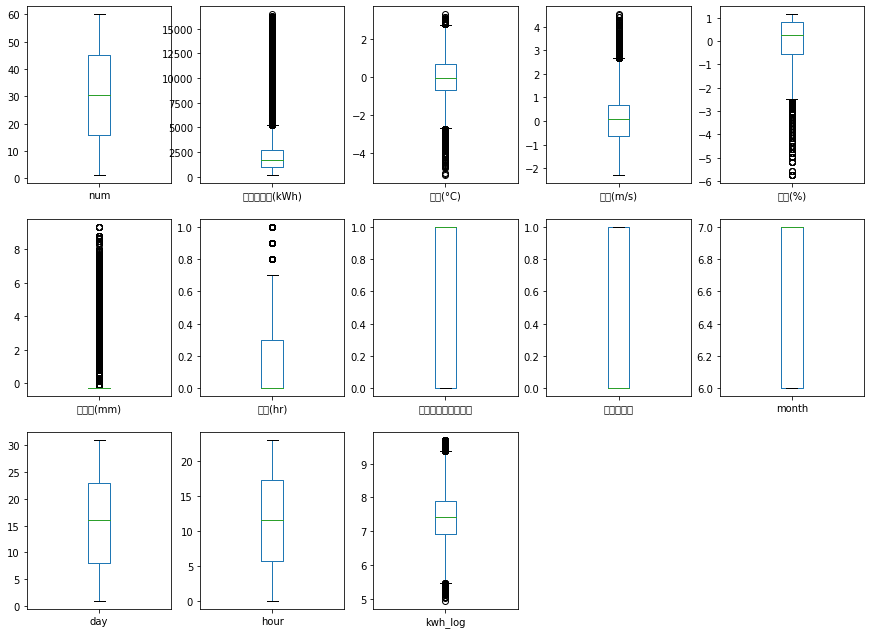

In [ ]:
# 분산치 확인 (박스 그래프)
train.plot(kind='box', figsize=(15,15), subplots=True, layout=(4,5))
plt.show

In [ ]:
train.var()

num           2.999201e+02
전력사용량(kWh)    4.019446e+06
기온(°C)        1.000011e+00
풍속(m/s)       1.000011e+00
습도(%)         1.000011e+00
강수량(mm)       1.000011e+00
일조(hr)        1.441573e-01
비전기냉방설비운영     2.163914e-01
태양광보유         2.497251e-01
month         2.499357e-01
day           7.756337e+01
hour          4.791721e+01
kwh_log       5.433328e-01
dtype: float64

In [ ]:
# 분산값이 0인 컬럼 제거
train.var()[train.var() == 0] # year
train.drop(train.var()[train.var() == 0].index, axis = 1, inplace=True)

In [ ]:
features = [
    'num',
    '기온(°C)',
    '풍속(m/s)',
    '습도(%)',
    '강수량(mm)',
    '일조(hr)',
    '비전기냉방설비운영',
    '태양광보유',
    'month',
    'day',
    'hour'
]
X = train[features]
X

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...
87835,60,25.0,2.7,95.0,0.0,0.0,1.0,1.0,7,31,19
87836,60,24.9,2.5,96.0,0.0,0.0,1.0,1.0,7,31,20
87837,60,24.9,1.9,96.0,0.0,0.0,1.0,1.0,7,31,21
87838,60,24.9,2.8,97.0,0.0,0.0,1.0,1.0,7,31,22


In [ ]:
# y label log 변환
train['kwh_log'] = np.log1p(train['전력사용량(kWh)'])
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour,kwh_log
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,9.009454
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,9.004133
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,9.000622
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,8.993404
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,8.992759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,60,2020-07-31 19:00:00,3603.744,25.0,2.7,95.0,0.0,0.0,1.0,1.0,7,31,19,8.190006
87836,60,2020-07-31 20:00:00,3688.848,24.9,2.5,96.0,0.0,0.0,1.0,1.0,7,31,20,8.213341
87837,60,2020-07-31 21:00:00,3765.312,24.9,1.9,96.0,0.0,0.0,1.0,1.0,7,31,21,8.233852
87838,60,2020-07-31 22:00:00,3833.568,24.9,2.8,97.0,0.0,0.0,1.0,1.0,7,31,22,8.251812


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, train['kwh_log'], random_state=123, test_size=0.2)

In [ ]:
model = RandomForestRegressor(n_estimators=600, random_state=123, n_jobs=1).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-01-08-38.csv
제출 여부 :success
오늘 제출 횟수 : 5
제출 결과:0.2591338228658714


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# 다른 모델로 확인해보기
# decision
model = DecisionTreeRegressor(max_depth=5 ,random_state=123).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-01-01-43.csv
제출 여부 :success
오늘 제출 횟수 : 3
제출 결과:0.6042177551190486


In [ ]:
# gradient
model = GradientBoostingRegressor(n_estimators=750, random_state=123).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-01-03-05.csv
제출 여부 :success
오늘 제출 횟수 : 4
제출 결과:0.29244268463002415


In [ ]:
# xgb
model = XGBRegressor(learning_rate = 0.1, n_estimators=700, n_jobs=-1, gamma=3, max_depth=5).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

[01:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
파일을 저장하였습니다. 파일명: submission-01-12-04.csv
제출 여부 :success
오늘 제출 횟수 : 7
제출 결과:0.2913184364625581


In [ ]:
# lgbm
model = LGBMRegressor(learning_rate = 0.05, num_iterations=1000, n_jobs=-1, random_state=123, n_estimators=600).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


파일을 저장하였습니다. 파일명: submission-01-13-56.csv
제출 여부 :success
오늘 제출 횟수 : 9
제출 결과:0.27675673149906344


In [ ]:
# 이놈들을 한번 다져보자
continuous = ['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)',]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text

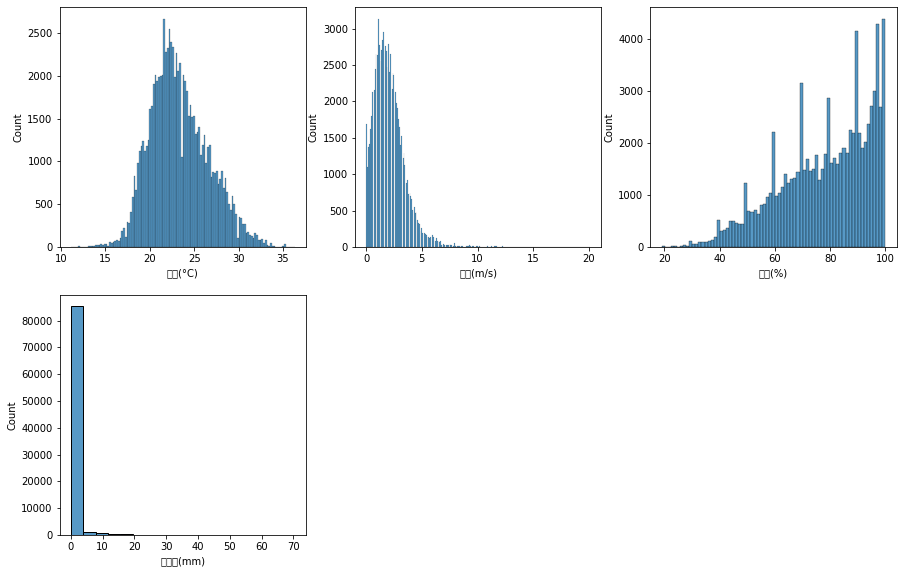

In [ ]:
plt.figure(figsize=(15, 15))
for index, col_name in enumerate(continuous):
    plt.subplot(3,3,index+1)
    sns.histplot(train[col_name])

In [ ]:
# 아래 컬럼들을 log 변환 적용
target_col = '기온(°C), 풍속(m/s), 습도(%), 강수량(mm)'.split(', ')
for col_name in target_col :
  train[col_name] = np.log1p(train[col_name])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text

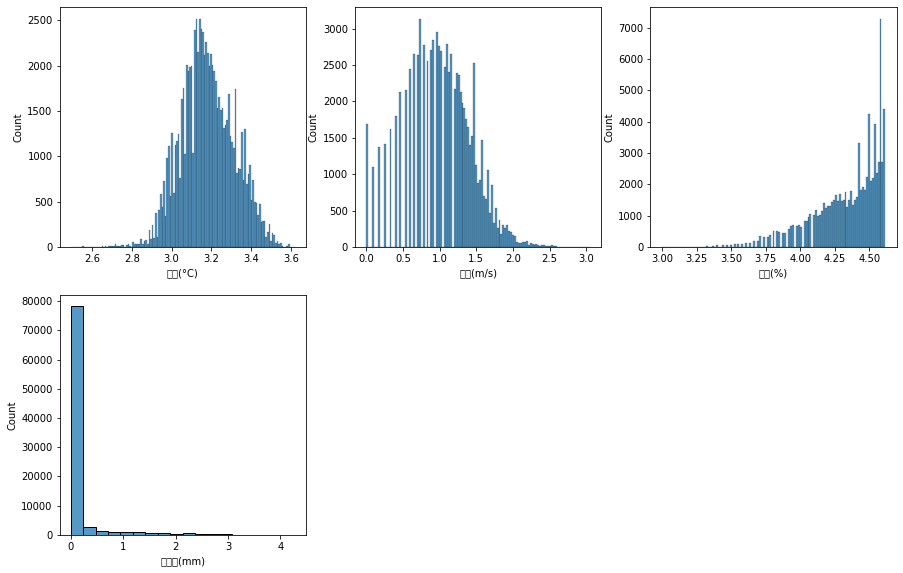

In [ ]:
# 다시 확인
plt.figure(figsize=(15, 15))
for index, col_name in enumerate(continuous):
    plt.subplot(3,3,index+1)
    sns.histplot(train[col_name])

In [ ]:
train_continuous = train[continuous].copy()
train_continuous

,기온(°C),풍속(m/s),습도(%),강수량(mm)
0,2.923162,1.252763,4.532599,0.587787
1,2.928524,1.360977,4.521789,0.262364
2,2.917771,1.435085,4.521789,0.000000
3,2.895912,1.435085,4.521789,0.000000
4,2.890372,1.458615,4.532599,0.000000
...,...,...,...,...
87835,3.258097,1.308333,4.564348,0.000000
87836,3.254243,1.252763,4.574711,0.000000
87837,3.254243,1.064711,4.574711,0.000000
87838,3.254243,1.335001,4.584967,0.000000


In [ ]:
# continous 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(train_continuous)

In [ ]:
# 표준화된 결과를 데이터 프레임에 대입
train.loc[:, continuous] = X_Scaled

In [ ]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour,kwh_log
0,1,2020-06-01 00:00:00,8179.056,-1.936847,0.499376,0.802318,1.034141,0.0,0.0,0.0,6,1,0,9.009454
1,1,2020-06-01 01:00:00,8135.640,-1.896711,0.741903,0.756156,0.299856,0.0,0.0,0.0,6,1,1,9.004133
2,1,2020-06-01 02:00:00,8107.128,-1.977199,0.907993,0.756156,-0.292145,0.0,0.0,0.0,6,1,2,9.000622
3,1,2020-06-01 03:00:00,8048.808,-2.140819,0.907993,0.756156,-0.292145,0.0,0.0,0.0,6,1,3,8.993404
4,1,2020-06-01 04:00:00,8043.624,-2.182289,0.960729,0.802318,-0.292145,0.0,0.0,0.0,6,1,4,8.992759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,60,2020-07-31 19:00:00,3603.744,0.570245,0.623918,0.937881,-0.292145,0.0,1.0,1.0,7,31,19,8.190006
87836,60,2020-07-31 20:00:00,3688.848,0.541400,0.499376,0.982129,-0.292145,0.0,1.0,1.0,7,31,20,8.213341
87837,60,2020-07-31 21:00:00,3765.312,0.541400,0.077915,0.982129,-0.292145,0.0,1.0,1.0,7,31,21,8.233852
87838,60,2020-07-31 22:00:00,3833.568,0.541400,0.683687,1.025923,-0.292145,0.0,1.0,1.0,7,31,22,8.251812


In [ ]:
# 다시 한번 나눠서 하기
X = train[features]
x_train, x_test, y_train, y_test = train_test_split(X, train['kwh_log'], random_state=123)

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=123, n_jobs=1).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-01-31-26.csv
제출 여부 :success
오늘 제출 횟수 : 10
제출 결과:0.25404376926338057


In [ ]:
features=['num', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유']
X = train[features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, train['kwh_log'], random_state=123)

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=123, n_jobs=1).fit(x_train, y_train)
prediction = model.predict(test[features])
prediction = np.expm1(prediction)
submission['전력사용량(kWh)'] = prediction
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-02-40-23.csv


KeyError: ignored